# AAPL Share Price Predictions Using Monte Carlo Simulations

In [3]:
# Import external packages

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[*********************100%%**********************]  1 of 1 completed


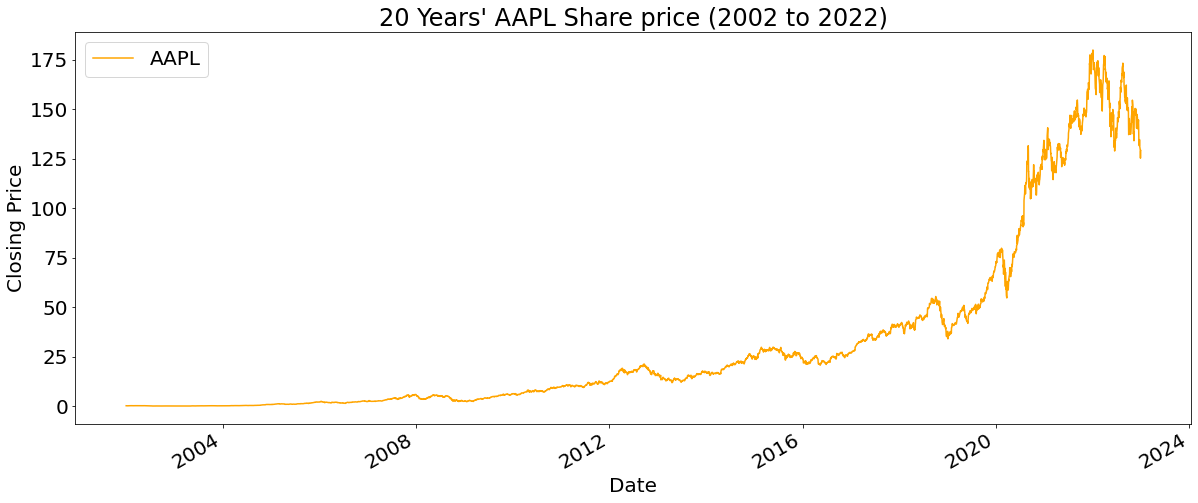

In [123]:
# Extract AAPL data from Yahoo Finance

ticker = 'AAPL'
stock_data = pd.DataFrame()
stock_data['AAPL'] = yf.download(ticker, start='2002-1-1', end= '2022-12-31')['Adj Close']

#Plot AAPL closing prices
stock_data.plot(figsize=(20,8), color='orange');
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.title("20 Years' AAPL Share price (2002 to 2022)")
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

Text(0, 0.5, 'Density of Above Log Returns')

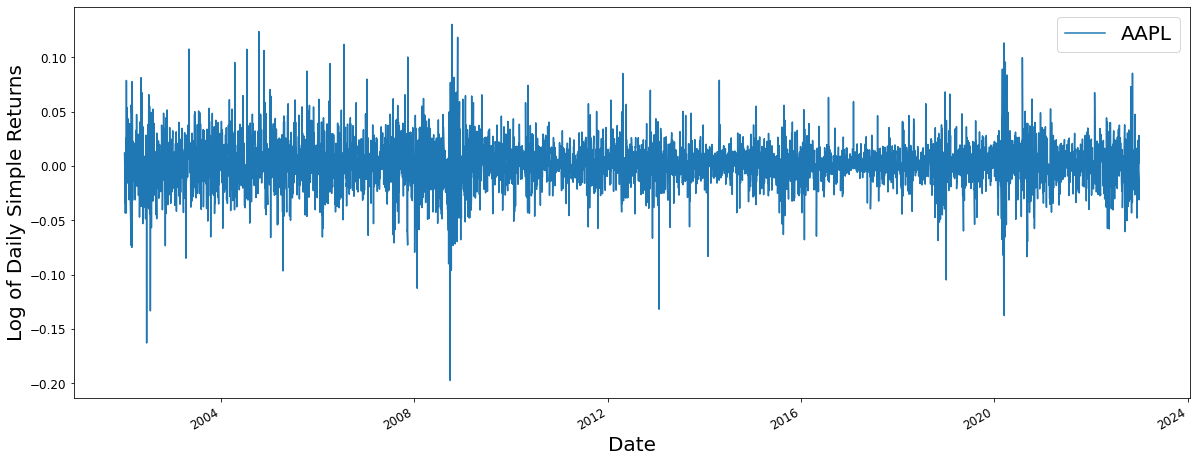

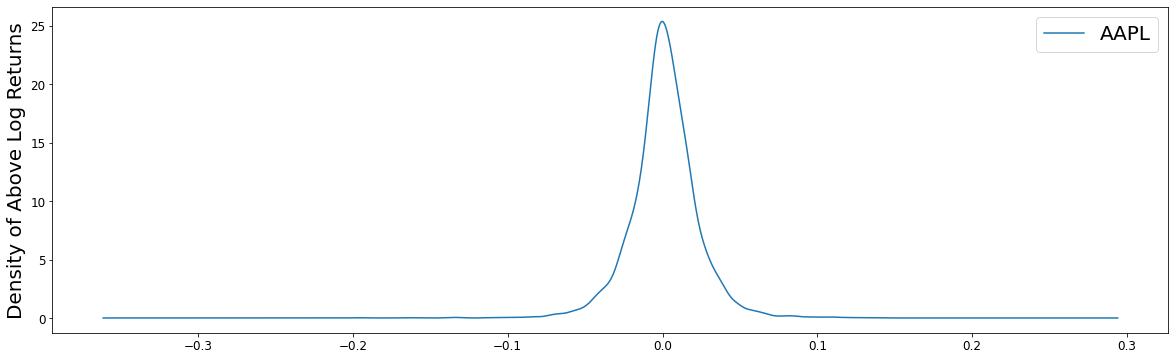

In [43]:
#Calculate historical log returns
log_ret = np.log(1 + stock_data.pct_change())

#Plot the log returns
log_ret.plot(figsize=(20,8))
plt.ylabel("Log of Daily Simple Returns")

#Plot the distributions of log returns
log_ret.plot.density(figsize=(20,6))
plt.ylabel("Density of Above Log Returns")

In [53]:
#Calculate stattistical measures of historical returns
mean = log_ret.mean()
variance = log_ret.var()
STD = log_ret.std()

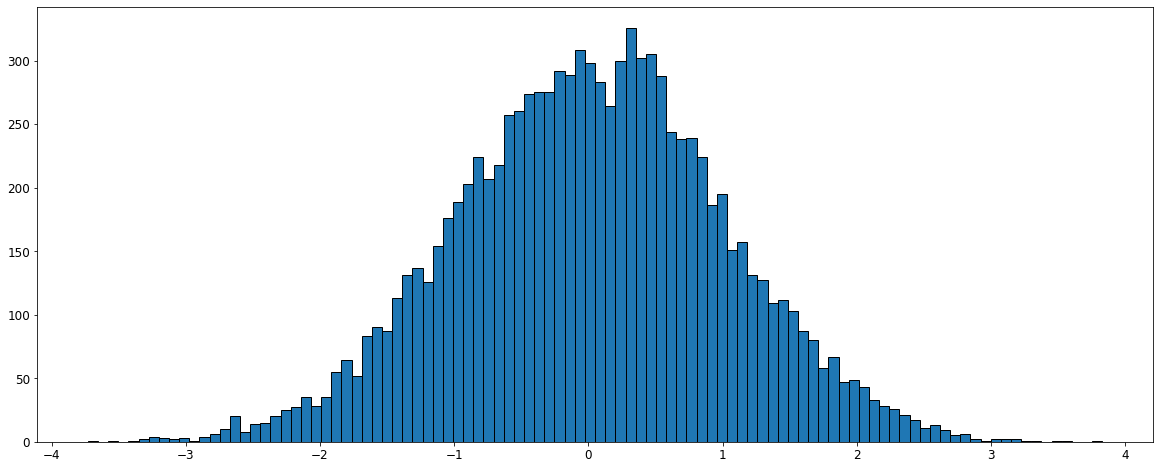

In [108]:
#Simulate the future returns 

#Generate 10,000 random numbers ranging between 0 and 1
random_n = np.random.rand(10000)

#Plot the Normal Distribution of the 10,000 random number generated
plt.figure(figsize=(20,8))
plt.hist(norm.ppf(random_n), bins=100, edgecolor='black');

In [59]:
#Simulate the future daily returns
trading_days = 250
simulations = 10000

#Simulating 10,000 simulations of 250 trading days
daily_logret_sim = STD.values * norm.ppf(np.random.rand(trading_days, simulations))
daily_simpleret_sim = np.exp(daily_logret_sim)
daily_simpleret_sim.shape

(250, 10000)

In [60]:
daily_simpleret_sim

array([[1.01864674, 1.0424939 , 1.00232014, ..., 0.99200408, 1.01867674,
        1.01536414],
       [0.99101328, 1.00951085, 1.01528025, ..., 1.02168659, 0.93983788,
        0.99001998],
       [0.97938329, 1.04571263, 0.9497672 , ..., 1.01284555, 0.99856173,
        1.0218527 ],
       ...,
       [0.98495022, 1.00272228, 0.99192037, ..., 1.00435644, 1.00492699,
        1.00298205],
       [0.9918132 , 0.96114443, 0.98135193, ..., 1.02312883, 1.00883031,
        1.00553481],
       [0.98121575, 1.04598091, 0.97969915, ..., 1.01770177, 1.00142359,
        0.99802413]])

In [61]:
#Estimating future prices using simulated 250days return

#Last know price is of the date 2022-31-12
latest_price = stock_data.iloc[-1]

#Creating an array of zeros to fill with simulated returns
price_sim = np.zeros_like(daily_simpleret_sim)

#Set the first row of the price_sim with lastest stock price
price_sim[0] = latest_price

price_sim

array([[129.20777893, 129.20777893, 129.20777893, ..., 129.20777893,
        129.20777893, 129.20777893],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

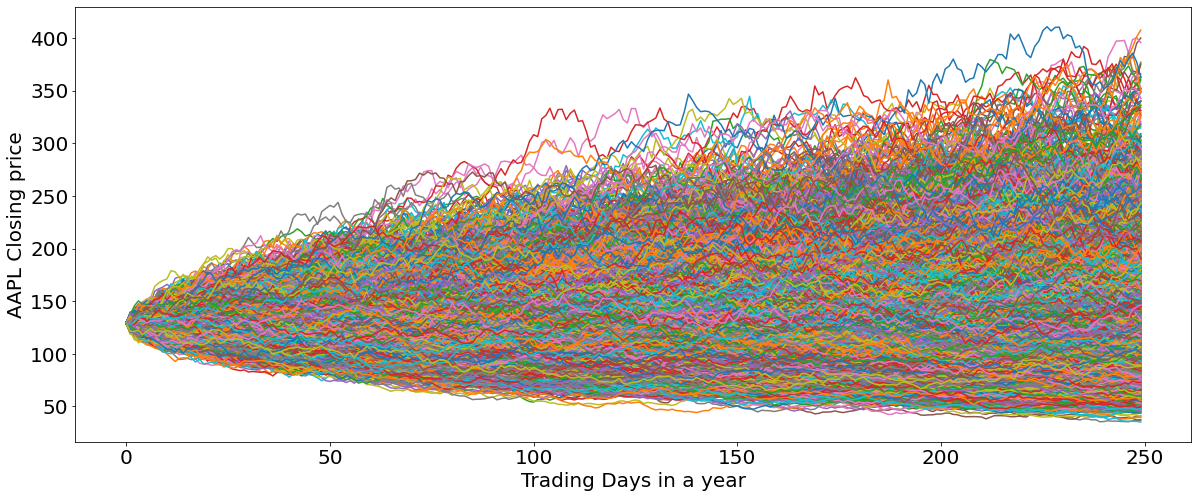

In [119]:
#Now fill the price_sim with a for loop

for day in range(1, trading_days):
    price_sim[day] = price_sim[day-1] * daily_simpleret_sim[day]
    
#Plot the simulated AAPL share prices

plt.figure(figsize=(20,8))
plt.xlabel("Trading Days in a year")
plt.ylabel("AAPL Closing price")
plt.rc('xtick', labelsize=12)    
plt.rc('ytick', labelsize=12)
plt.plot(price_sim)
plt.show()

In [120]:
#Quantifications & Analysis of the simulated stock prices on 250th Trading day

Worst_case = round(price_sim[-1].min(),2)
Average_case = round(price_sim[-1].mean(),2)
Best_case = round(price_sim[-1].max(),2)

print (f'Worst case simulated price on 250th day $/share:{Worst_case}')
print (f'Average case simulated price on 250th day $/share:{Average_case}')
print (f'Best case simulated price on 250th day $/share:{Best_case}')
print('\n')

#Setting up confidence intervals
Mean_Day250_price = price_sim[-1].mean()
STD_Day250_price = price_sim[-1].std()

One_SD_UPPER = Mean_Day250_price + STD_Day250_price*1
One_SD_LOWER = Mean_Day250_price - STD_Day250_price*1

Two_SD_UPPER = Mean_Day250_price + STD_Day250_price*2
Two_SD_LOWER = Mean_Day250_price - STD_Day250_price*2

print(f'68% confident that Day250 price will lie between ${round(One_SD_LOWER,2)} and ${round(One_SD_UPPER,2)}')
print(f'95% confident that Day250 price will lie between ${round(Two_SD_LOWER,2)} and ${round(Two_SD_UPPER,2)}')

Worst case simulated price on 250th day $/share:35.19
Average case simulated price on 250th day $/share:136.93
Best case simulated price on 250th day $/share:407.54


68% confident that Day250 price will lie between $88.6 and $185.26
95% confident that Day250 price will lie between $40.27 and $233.59


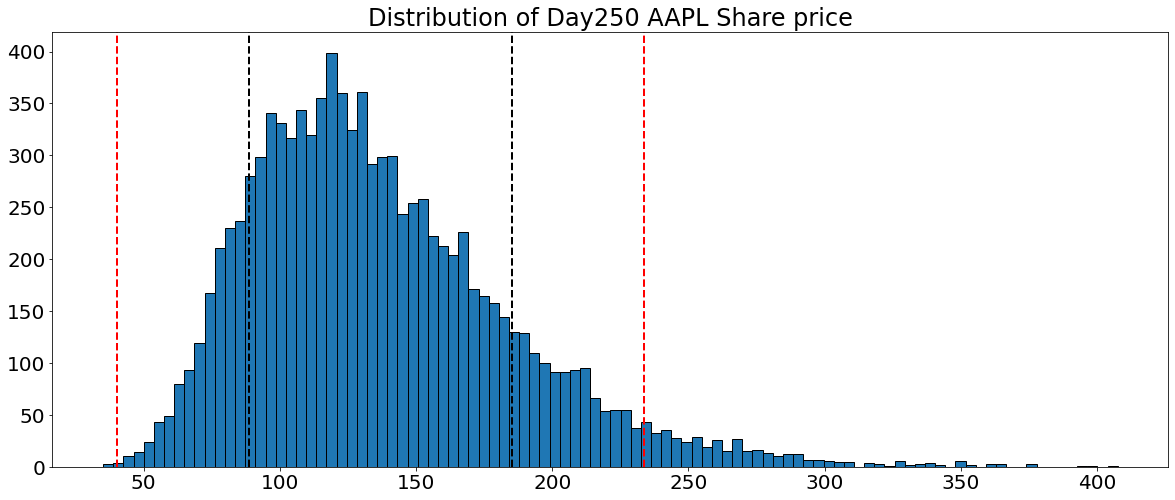

In [122]:
Day250_sim = price_sim[-1]
Day250_sim
plt.figure(figsize=(20,8))
plt.title("Distribution of Day250 AAPL Share price")
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.axvline(One_SD_LOWER, color = 'black', linestyle = 'dashed', linewidth = 2)
plt.axvline(One_SD_UPPER, color = 'black', linestyle = 'dashed', linewidth = 2)
plt.axvline(Two_SD_LOWER, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(Two_SD_UPPER, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.hist(Day250_sim, bins=100, edgecolor='black')
plt.show()